In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.preprocessing import scale
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv("data/bikes_rent.csv")

In [19]:
data = data.dropna()

In [20]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [21]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


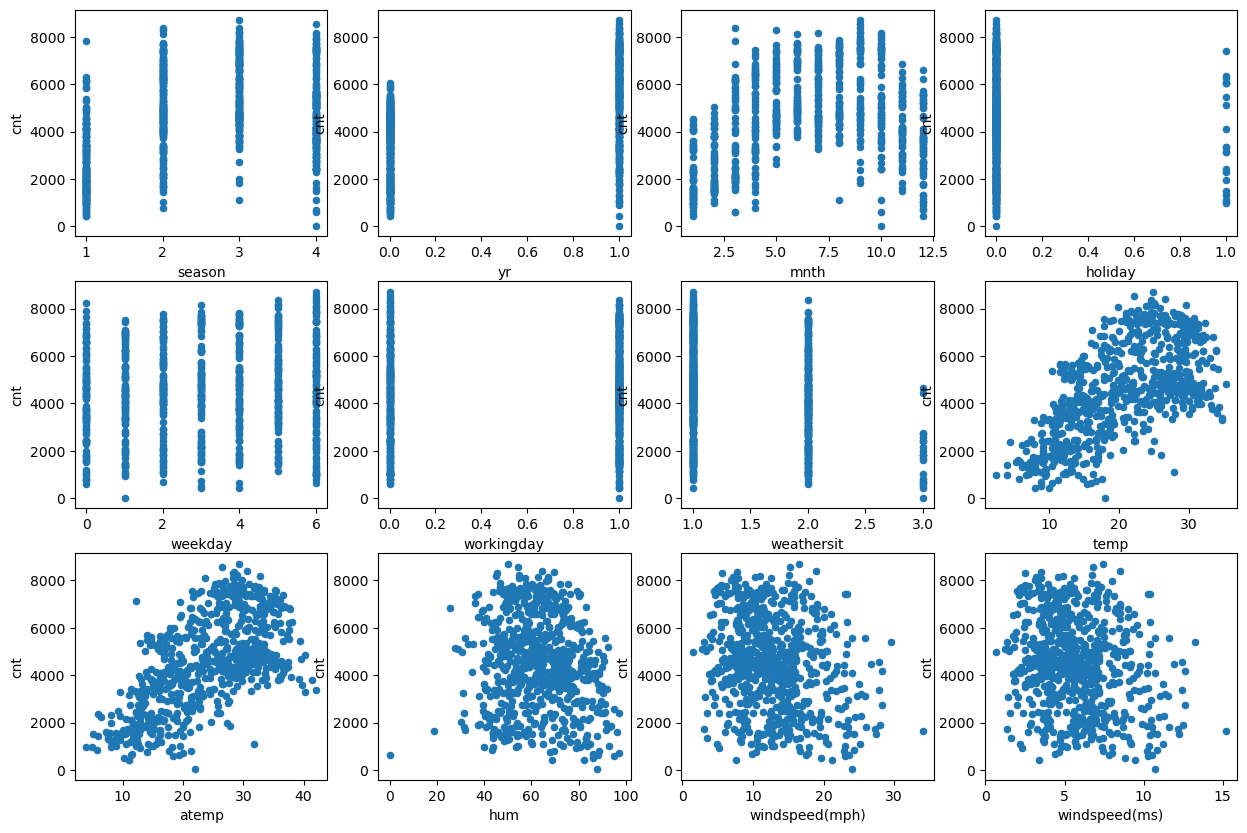

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

#### Блок 1. Ответы на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

Очевидно, что число прокатов коррелирует с температурой воздуха. Поздней весной, летом и раней осенью число прокатов наибольшее. В остальное время года количество падает почти до нуля.

#### Укажите один или два признака, от которых число прокатов, скорее всего, зависит линейно.

- Температура. С её повышением наблюдается рост прокатов.
- Скорость ветра. Когда она повышается, снижается количество людей, арендующих данное средство передвижения.

<AxesSubplot: >

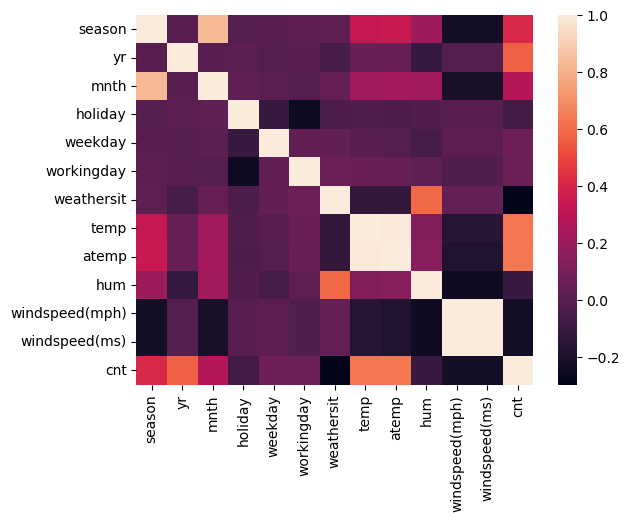

In [23]:
sns.heatmap(data.corr())

# data.corrwith()

In [24]:
data.corr()

# data.corr(columns=["temp", "atemp"])

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


In [25]:
data.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [26]:
data_shuffled = shuffle(data, random_state=123)
X = scale(data_shuffled[data_shuffled.columns[:-1]])
y = data_shuffled["cnt"]

X.shape

(731, 12)

In [35]:
def print_signs(columns, coefs) -> None:
    for sign, coef in zip(columns, coefs):
        print(f"[+] Sign {sign}: {coef:.2f}")

In [36]:
lr = LinearRegression().fit(X, y)

print_signs(data.columns, lr.coef_)

[+] Sign season: 570.87
[+] Sign yr: 1021.96
[+] Sign mnth: -141.30
[+] Sign holiday: -86.76
[+] Sign weekday: 137.23
[+] Sign workingday: 56.39
[+] Sign weathersit: -330.23
[+] Sign temp: 367.44
[+] Sign atemp: 585.59
[+] Sign hum: -145.61
[+] Sign windspeed(mph): 12457432783285.71
[+] Sign windspeed(ms): -12457432783484.15


In [37]:
ridge = Ridge().fit(X, y)

print_signs(data.columns, ridge.coef_)

[+] Sign season: 563.06
[+] Sign yr: 1018.95
[+] Sign mnth: -131.87
[+] Sign holiday: -86.75
[+] Sign weekday: 138.01
[+] Sign workingday: 55.90
[+] Sign weathersit: -332.35
[+] Sign temp: 386.46
[+] Sign atemp: 566.35
[+] Sign hum: -145.07
[+] Sign windspeed(mph): -99.26
[+] Sign windspeed(ms): -99.26


In [38]:
lasso = Lasso().fit(X, y)

print_signs(data.columns, lasso.coef_)

[+] Sign season: 560.24
[+] Sign yr: 1019.46
[+] Sign mnth: -128.73
[+] Sign holiday: -86.15
[+] Sign weekday: 137.35
[+] Sign workingday: 55.21
[+] Sign weathersit: -332.37
[+] Sign temp: 376.36
[+] Sign atemp: 576.53
[+] Sign hum: -144.13
[+] Sign windspeed(mph): -197.14
[+] Sign windspeed(ms): -0.00


In [39]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha=alpha).fit(X, y)
    
    for j in range(X.shape[1]):
        coefs_ridge[i][j] = ridge.coef_[j]
        coefs_lasso[i][j] = lasso.coef_[j]

Text(0, 0.5, 'Feature weight')

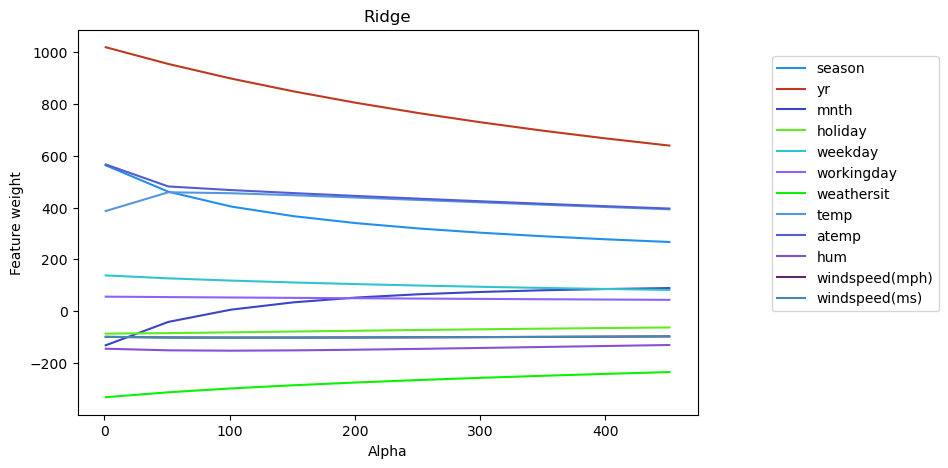

In [44]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.title("Ridge")
plt.xlabel("Alpha")
plt.ylabel("Feature weight")

Text(0, 0.5, 'Feature weight')

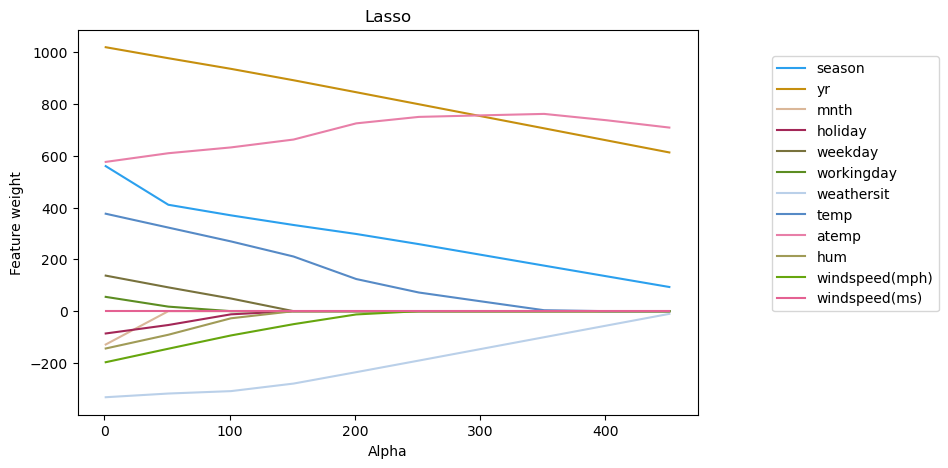

In [45]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.title("Lasso")
plt.xlabel("Alpha")
plt.ylabel("Feature weight")

#### Блок 2. Ответы на вопросы:

#### Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?

Lasso уменьшает агрессивнее, так как его основная функция выделить полезные и бесполезные признаки.

#### Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.

Кажется, что все веса будут стремиться к какому-то общему значению (к нулю). Так происходит, потому что штраф лассо - квадратный (или кубический, или гиперкубический), то есть у него много острых углов и рёбер, у функции ошибок вероятность наткнуться на ребро или угол больше, следовательно и вероятность занулить один или больше коэффициентов больше.

#### Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Ситается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.

Lasso исключит в скорость ветра в любом случае, но его отличие от Ridge в том, что он сделает это гораздо быстрее.

#### Какой из регуляризаторов подойдет для отбора неинформативных признаков?

Понятие неинформативности признака довольно спорное, так как на разных моделях признак может проявлять своё влияние по-разному. Но очевидный ответ, который хотят услышать - это Lasso :)

In [47]:
alphas = np.arange(1, 100, 5)

lasso_cv = LassoCV(alphas=alphas, cv=3).fit(X, y)

lasso_cv.mse_path_

array([[863936.50981215, 826364.11936907, 862993.29751895],
       [860479.31511365, 821110.1817776 , 853075.13780624],
       [857344.83606082, 816153.27782428, 843628.81286097],
       [854526.73639431, 811496.34805693, 834654.45357262],
       [852024.62341384, 807139.39657173, 826152.16399015],
       [849838.18755426, 803082.42338526, 818122.01934906],
       [847967.16232762, 799325.42849761, 810564.07404745],
       [846411.31812809, 795868.41190876, 803478.36741509],
       [845170.45707972, 792711.37361871, 796864.92788593],
       [844244.40861679, 789854.31362747, 790723.77601555],
       [843633.02568868, 787297.23193504, 785058.69560904],
       [843336.18149882, 785040.12854141, 779861.12465128],
       [843353.76670096, 783083.00344659, 775139.9023601 ],
       [843616.44582031, 781425.85665058, 770886.43550572],
       [843608.19759457, 780068.68815337, 767109.44006007],
       [844145.56423514, 777586.36117475, 763800.36416062],
       [845219.34650306, 775290.91645251

Text(0, 0.5, 'Alpha')

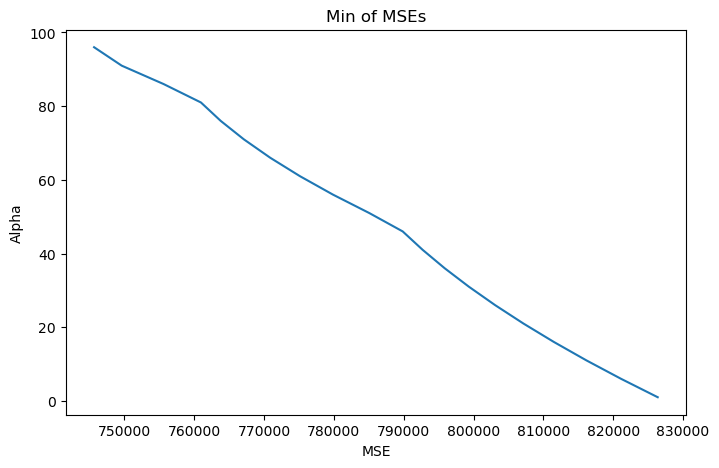

In [49]:
plt.figure(figsize=(8, 5))

plt.plot([min(mse) for mse in lasso_cv.mse_path_], alphas)

plt.title("Min of MSEs")
plt.xlabel("MSE")
plt.ylabel("Alpha")

Text(0, 0.5, 'Alpha')

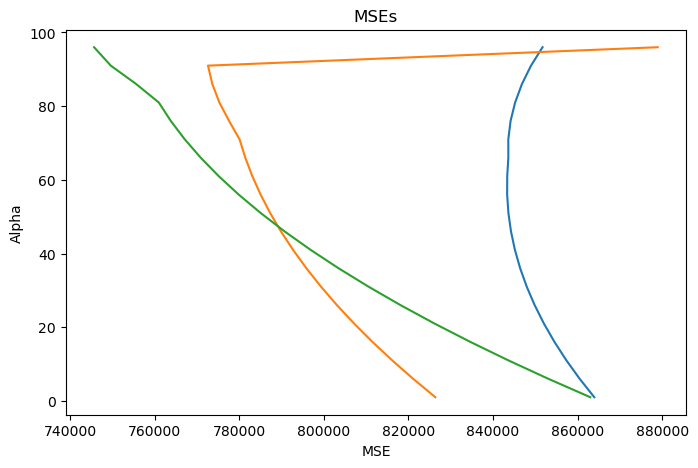

In [52]:
plt.figure(figsize=(8, 5))

for i in range(3):
    plt.plot([mse[i] for mse in lasso_cv.mse_path_], alphas)

plt.title("MSEs")
plt.xlabel("MSE")
plt.ylabel("Alpha")

#### Блок 3. Ответы на вопросы:

#### В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?

- Год
- Сезон
- Ощущаемая температура
- Температура

Утверждать, что при повышении этих параметров количество арендаторов увеличится, нелогично, так как значимое повышение температуры не способствует возможности ездить на велосипеде. Что касается сезона и года (почему-то), то можно сделать вывод о их незначимости, так как данные категориальны и их повышение будет означать лишь переход из одного класса в друго.

#### Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?

- Благоприятность погоды
- Скорость ветра
- Влажность
- Выходной

То же самое, что и с предыдущим вопросом.

#### Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?

- Скорость ветра (метры в секунду)

В действительности, этот параметр сильно влияет на модель и, при его единственности, регуляризатор вряд ли спустил бы его значимость в нуль.